## Aula 1 - Algebra linear

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.utils import resample
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency, chi2
import researchpy

In [2]:
# escalar => número (tensor de ordem 0)
# vetor
# matriz

x = 2 # escalar
x2 = np.array([1,2,3]) # único vetor com 3 componentes (vetor linha) - vetor de escalares
x3 = np.array([[1],[2],[3]]) # matriz coluna com 3 vetores - vetor de vetores com escalares
x4 = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]]) # matriz tradicional

print(x2)
print()
print(x3)
print()
print(x4)

[1 2 3]

[[1]
 [2]
 [3]]

[[1 2 3]
 [1 2 3]
 [1 2 3]]


In [3]:
lista = np.array([1, 2, 3, 4, 5])
df = pd.DataFrame({'coluna': lista, 'coluna 2': lista})
df

,coluna,coluna 2
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
type(df.coluna)

pandas.core.series.Series

In [6]:
lista[:1]

array([1])

In [7]:
x2 + x3

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [8]:
x3 + x4

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [9]:
x5 = np.array([[1], [2]])

In [10]:
# multiplicar
# arr1 (x,y) / arr2 (z,w) ---> arr3 (x,w)
# A.B != B.A

# np.dot(x4, x3) # diferente de soma, produto interno de matriz
x4@x3

array([[14],
       [14],
       [14]])

In [11]:
# Divisão
# A.B = Y --> equação fundamental da algebra linear


'''
Para os escalares, o zero na soma e na subtração é que chamamos de elemento neutro.
Porém, o 1 na multiplicação e na divisão é o elemento neutro.
'''
# x4/x3
x3/x4

array([[1.        , 0.5       , 0.33333333],
       [2.        , 1.        , 0.66666667],
       [3.        , 1.5       , 1.        ]])

In [12]:
zeros = np.zeros((3, 3))
ones = np.ones((3, 3))
print(zeros)
print()
print(ones)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


$$A = \begin{pmatrix}
a_{00} & a_{01} & a_{02} \\ a_{10} & a_{11} & a_{12} \\ a_{20} & a_{21} & a_{22}
\end{pmatrix}$$

In [13]:
id = np.eye(3)
id

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [14]:
x4 * 1

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

$$x \cdot x^{-1} = 1$$
---
matriz inversa
$$A \cdot A^{-1} = 1$$
---
Eq. fundamental da álgebra

$$A . X = Y$$
$$A . A^{-1} . X = A^{-1} . Y$$
$$X = AA^{-1} . X.Y$$
$$X - (A^{T}A)^{-1}A^{T}Y$$


Text(0.5, 1.0, 'Interpolação de reta sobre todos os pontos')

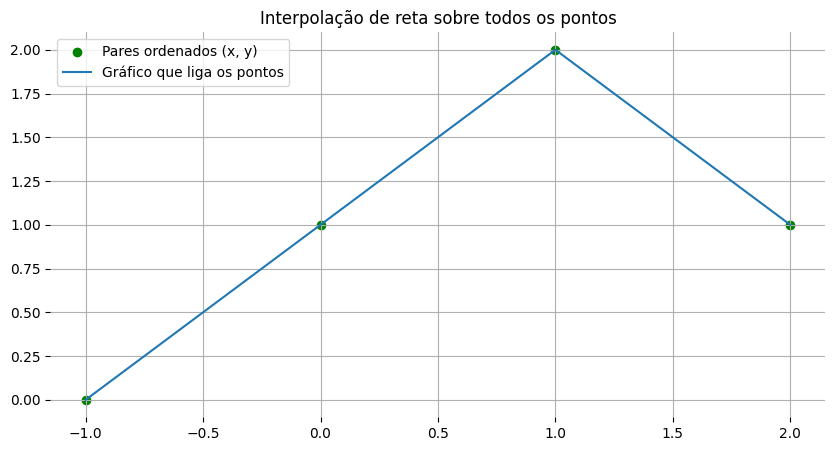

In [15]:
x1, y1 = -1, 0
x2, y2 = 0, 1
x3, y3 = 1, 2
x4, y4 = 2, 1

x = [x1, x2, x3, x4]
y = [y1, y2, y3, y4]

plt.figure(figsize = (10, 5))
plt.scatter(x1, y1, color = 'green', label = 'Pares ordenados (x, y)')
plt.scatter(x2, y2, color = 'green')
plt.scatter(x3, y3, color = 'green')
plt.scatter(x4, y4, color = 'green')
plt.plot(x, y, label = 'Gráfico que liga os pontos')
plt.grid(True)
plt.box(False)
plt.legend()
plt.title('Interpolação de reta sobre todos os pontos')

In [16]:
# y = mx + n
# 0 = -1*m + 1*n
# 1 = 0*m + 1*n

A = np.array([[-1, 1], [0, 1], [1, 1], [2, 1]])
y = np.array([[y1], [y2], [y3], [y4]])

In [17]:
A

array([[-1,  1],
       [ 0,  1],
       [ 1,  1],
       [ 2,  1]])

In [18]:
y

array([[0],
       [1],
       [2],
       [1]])

In [19]:
(m, n) = np.dot(np.dot(np.linalg.pinv(np.dot(A.T, A)), A.T), y)
print(m, n)

[0.4] [0.8]


Text(0.5, 1.0, 'Interpolação de reta sobre todos os pontos')

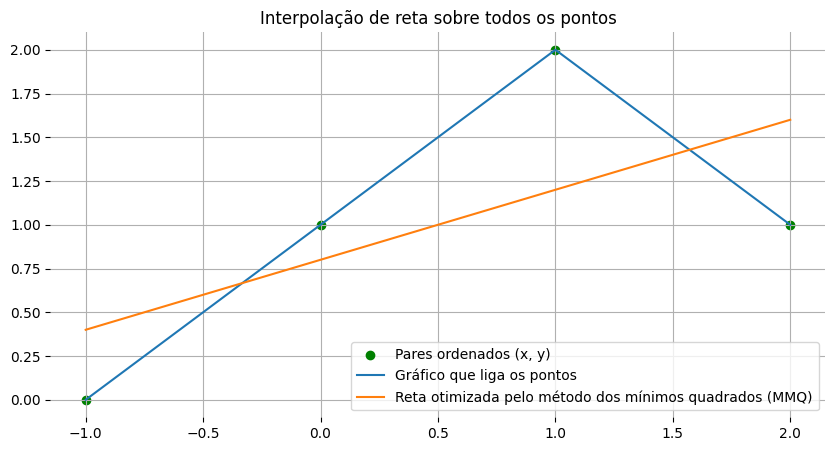

In [20]:
plt.figure(figsize = (10, 5))
plt.scatter(x1, y1, color = 'green', label = 'Pares ordenados (x, y)')
plt.scatter(x2, y2, color = 'green')
plt.scatter(x3, y3, color = 'green')
plt.scatter(x4, y4, color = 'green')
v_x = np.linspace(-1, 2)
plt.plot(x, y, label = 'Gráfico que liga os pontos')
plt.plot(v_x, m * v_x + n, label = 'Reta otimizada pelo método dos mínimos quadrados (MMQ)')
plt.grid(True)
plt.box(False)
plt.legend()
plt.title('Interpolação de reta sobre todos os pontos')

## Aula 1 - Estatística

In [21]:
# Variável categórica (dados rotulados)
# Variável discreta (números inteiros)
# Variável continua (números reais)

In [22]:
# Medidas de tendência central
# Média
# Mediana
# Moda

In [23]:
# Formas de distribuição
# Distribuição normal (sino) --> Gaussiana
# Distribuição assimétrica a direita
# Distribuição assimétrica a esquerda
# Distribuição bimodal

In [24]:
# Medidas de variabilidade
# Amplitude
# Desvio padrão --> raiz quadrada da variância
# Variância --> sigma ao quadrado --> somatório de xi - média elevado ao quadrado dividido pelo número de variáveis
# Quartis

## Aula 2 - Principais bibliotecas de Machine Learning
**Pandas**, **Numpy**, **Matplotlib** e **Scikit-Learn**.

In [25]:
df_excel = pd.read_excel('../../../Data/Fase 2/Chess.xlsx', sheet_name='Chess')
df_csv = pd.read_csv('../../../Data/Fase 2/Tomato.csv', sep=',')

In [26]:
df_excel.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+17,1.504130e+17,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,1.504110e+17,1.504110e+17,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,1.504030e+17,1.504030e+17,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5


In [27]:
df_csv.head(2)

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato


In [28]:
df_csv.tail()

,Date,Unit,Minimum,Maximum,Average,Market
2736,2021-05-09,Kg,10,15,12.5,Tomato
2737,2021-05-10,Kg,10,15,12.5,Tomato
2738,2021-05-11,Kg,10,15,12.5,Tomato
2739,2021-05-12,Kg,30,35,32.5,Tomato
2740,2021-05-13,Kg,35,40,37.5,Tomato


In [29]:
df_csv.shape

(2741, 6)

In [30]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           20058 non-null  bool   
 1   created_at      20058 non-null  float64
 2   last_move_at    20058 non-null  float64
 3   turns           20058 non-null  int64  
 4   victory_status  20058 non-null  object 
 5   winner          20058 non-null  object 
 6   increment_code  20058 non-null  object 
 7   white_id        20058 non-null  object 
 8   white_rating    20058 non-null  int64  
 9   black_id        20058 non-null  object 
 10  black_rating    20058 non-null  int64  
 11  opening_eco     20058 non-null  object 
 12  opening_name    20058 non-null  object 
 13  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 2.0+ MB


In [31]:
df_csv.describe()

,Minimum,Maximum,Average
count,2741.000000,2741.000000,2741.000000
mean,35.089748,41.281284,38.185516
std,16.648425,17.364135,16.970949
min,8.000000,12.000000,10.000000
25%,22.000000,30.000000,25.000000
50%,30.000000,38.000000,35.000000
75%,45.000000,50.000000,47.500000
max,115.000000,120.000000,117.500000


In [32]:
df_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
Minimum,2741.0,35.089748,16.648425,8.0,22.0,30.0,45.0,115.0
Maximum,2741.0,41.281284,17.364135,12.0,30.0,38.0,50.0,120.0
Average,2741.0,38.185516,16.970949,10.0,25.0,35.0,47.5,117.5


In [33]:
set(df_excel["victory_status"]) # traz todas as categorias nessa coluna

{'draw', 'mate', 'outoftime', 'resign'}

In [34]:
def categorizar_tomate_media(media):
    if media >= 40 and media <= 70:
        return "tomate medio"
    elif media >= 40:
        return "tomate pequeno"
    else:
        return "tomate grande"

In [35]:
df_csv["categoria_tomate"] = df_csv["Average"].apply(categorizar_tomate_media)

In [36]:
df_csv.head(2)

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate grande
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate grande


In [37]:
df_csv.groupby(["categoria_tomate"]).describe()

Minimum                                                      \
                   count       mean       std   min   25%   50%   75%    max   
categoria_tomate                                                               
tomate grande     1638.0  23.978022  7.175572   8.0  18.0  25.0  30.0   38.0   
tomate medio       954.0  47.818658  8.203065  30.0  40.0  45.0  55.0   65.0   
tomate pequeno     149.0  75.744966  7.324666  65.0  70.0  75.0  80.0  115.0   

                 Maximum             ...              Average             \
                   count       mean  ...   75%    max   count       mean   
categoria_tomate                     ...                                   
tomate grande     1638.0  29.528694  ...  35.0   44.0  1638.0  26.753358   
tomate medio       954.0  55.009434  ...  60.0   75.0   954.0  51.414046   
tomate pequeno     149.0  82.583893  ...  85.0  120.0   149.0  79.164430   

                                                           
                       std   min   25%   50%   75%    max  
categoria_tomate                                           
tomate grande     7.191735  10.0  21.5  27.5  32.5   39.5  
tomate medio      8.272792  40.0  45.0  50.0  57.5   70.0  
tomate pequeno    7.367396  70.5  75.0  77.5  82.5  117.5  

[3 rows x 24 columns]

In [38]:
filtro_tomate_pequeno = df_csv['Average'] < 40
df_csv.loc[filtro_tomate_pequeno]

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate grande
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate grande
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate grande
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate grande
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate grande
...,...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato,tomate grande
2737,2021-05-10,Kg,10,15,12.5,Tomato,tomate grande
2738,2021-05-11,Kg,10,15,12.5,Tomato,tomate grande
2739,2021-05-12,Kg,30,35,32.5,Tomato,tomate grande


In [39]:
arr_list = np.array([1, 2, 3, 4, 5, 6, 7, 8])
print(arr_list)

[1 2 3 4 5 6 7 8]


In [40]:
arr_zeros = np.zeros((4, 6))
print(arr_zeros)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [41]:
arr_ones = np.ones((3, 4))
print(arr_ones)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [42]:
arr_random = np.random.rand(3, 4)
print(arr_random)

[[0.48755499 0.97331351 0.88330088 0.26705438]
 [0.69298074 0.51703739 0.64982074 0.91629987]
 [0.70911866 0.00339804 0.56749899 0.58933026]]


In [43]:
print(arr_random.shape)

(3, 4)


In [44]:
arr_range = np.arange(0, 10, 2)
print(arr_range)

[0 2 4 6 8]


In [45]:
arr_random_reshape = arr_random.reshape((4, 3))
print(arr_random_reshape)

[[0.48755499 0.97331351 0.88330088]
 [0.26705438 0.69298074 0.51703739]
 [0.64982074 0.91629987 0.70911866]
 [0.00339804 0.56749899 0.58933026]]


In [46]:
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])
arr3 = np.array([[9, 10], [11, 12]])
arr1

array([[1, 2],
       [3, 4]])

In [47]:
arr4 = np.concatenate((arr1, arr2, arr3), axis=1)
arr4

array([[ 1,  2,  5,  6,  9, 10],
       [ 3,  4,  7,  8, 11, 12]])

In [48]:
arr4_split = np.split(arr4, 2)
print(arr4_split)

[array([[ 1,  2,  5,  6,  9, 10]]), array([[ 3,  4,  7,  8, 11, 12]])]


In [49]:
arr_transposto = np.transpose(arr4)
print(arr_transposto)

[[ 1  3]
 [ 2  4]
 [ 5  7]
 [ 6  8]
 [ 9 11]
 [10 12]]


In [50]:
arr_revertido = arr_transposto.T
arr_revertido

array([[ 1,  2,  5,  6,  9, 10],
       [ 3,  4,  7,  8, 11, 12]])

In [51]:
arr_a = np.array([1, 7, 27])
arr_b = np.array([1, 5, 1])

In [52]:
arr_a_b = np.add(arr_a, arr_b)
arr_a_b

array([ 2, 12, 28])

In [53]:
arr_sub_a_b = np.subtract(arr_a, arr_b)
arr_sub_a_b

array([ 0,  2, 26])

In [54]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2741 non-null   object 
 1   Unit              2741 non-null   object 
 2   Minimum           2741 non-null   int64  
 3   Maximum           2741 non-null   int64  
 4   Average           2741 non-null   float64
 5   Market            2741 non-null   object 
 6   categoria_tomate  2741 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 150.0+ KB


In [55]:
df_csv["Date"] = pd.to_datetime(df_csv["Date"])

In [56]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2741 non-null   datetime64[ns]
 1   Unit              2741 non-null   object        
 2   Minimum           2741 non-null   int64         
 3   Maximum           2741 non-null   int64         
 4   Average           2741 non-null   float64       
 5   Market            2741 non-null   object        
 6   categoria_tomate  2741 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 150.0+ KB


In [57]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           20058 non-null  bool   
 1   created_at      20058 non-null  float64
 2   last_move_at    20058 non-null  float64
 3   turns           20058 non-null  int64  
 4   victory_status  20058 non-null  object 
 5   winner          20058 non-null  object 
 6   increment_code  20058 non-null  object 
 7   white_id        20058 non-null  object 
 8   white_rating    20058 non-null  int64  
 9   black_id        20058 non-null  object 
 10  black_rating    20058 non-null  int64  
 11  opening_eco     20058 non-null  object 
 12  opening_name    20058 non-null  object 
 13  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 2.0+ MB


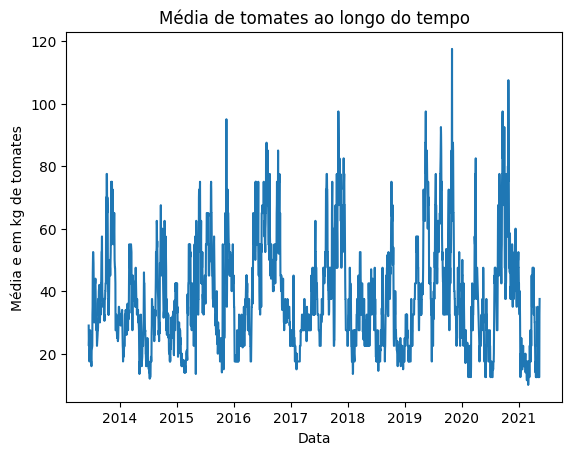

In [58]:
plt.plot(df_csv["Date"], df_csv["Average"])
plt.xlabel("Data")
plt.ylabel("Média e em kg de tomates")
plt.title("Média de tomates ao longo do tempo")
plt.show()

In [59]:
df_excel.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+17,1.504130e+17,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,1.504110e+17,1.504110e+17,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,1.504030e+17,1.504030e+17,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5


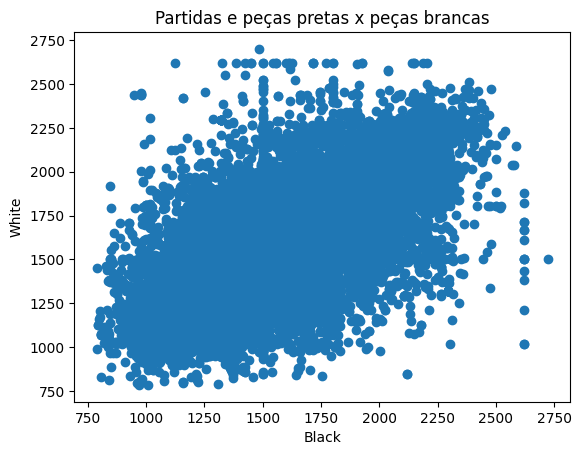

In [60]:
plt.scatter(df_excel["black_rating"], df_excel["white_rating"])
plt.xlabel("Black")
plt.ylabel("White")
plt.title("Partidas e peças pretas x peças brancas")
plt.show()

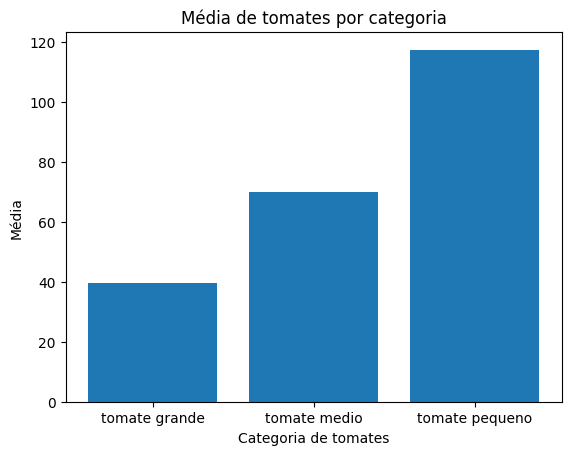

In [61]:
plt.bar(df_csv["categoria_tomate"], df_csv["Average"])
plt.xlabel("Categoria de tomates")
plt.ylabel("Média")
plt.title("Média de tomates por categoria")
plt.show()

In [63]:
# df_excel.groupby(['victory_status']).mean().plot(kind='pie', y='turns', autopct='%1.0f%%')
# plt.title('Média de partidas por status de vitória em xadrez')
# plt.show()

TypeError: Could not convert drawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdrawdraw to numeric

In [ ]:
df_diabetes = pd.read_csv('../../../Data/Fase 2/diabetes.csv', sep=',')
df_diabetes.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x = df_diabetes.drop(["Class variable"], axis=1)
x.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y = df_diabetes["Class variable"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Class variable, Length: 768, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
len(x_train)

537

In [ ]:
len(x_test)

231

In [ ]:
df_diabetes.shape

(768, 9)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
accuracy = knn.score(x_test, y_test)
print("Acurácia: {:.2f}%".format(round(accuracy,2) * 100))

Acurácia: 70.00%


## Aula 3 - (EDA)

In [ ]:
df = pd.read_excel('../../../Data/Fase 2/dataset_rolling_stones.xlsx')
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

In [ ]:
print(df.dtypes)

name                        object
album                       object
release_date        datetime64[ns]
track_number                 int64
acousticness               float64
danceability               float64
energy                     float64
instrumentalness           float64
liveness                   float64
loudness                   float64
speechiness                float64
tempo                      float64
valence                    float64
popularity                   int64
duration_ms                  int64
dtype: object


In [ ]:
df.shape

(1610, 15)

In [ ]:
print("Data Inicial: ", df["release_date"].min())

Data Inicial:  1964-04-16 00:00:00


In [ ]:
print("Data Final: ", df["release_date"].max())

Data Final:  2022-06-10 00:00:00


In [ ]:
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [ ]:
df.duplicated().sum()

6

In [ ]:
df[df.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


In [ ]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920


In [ ]:
df['duracao_em_min'] = df['duration_ms'] / 60000

In [ ]:
df.head(5)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [ ]:
df.groupby('album')['duracao_em_min'].mean()

album
12 X 5                              2.682068
12 x 5                              2.682772
A Bigger Bang (2009 Re-Mastered)    4.016356
A Bigger Bang (Live)                5.176630
Aftermath                           3.899185
                                      ...   
Undercover                          4.492750
Undercover (2009 Re-Mastered)       4.497595
Voodoo Lounge (Remastered 2009)     4.118779
Voodoo Lounge Uncut (Live)          5.248507
got LIVE if you want it!            2.762532
Name: duracao_em_min, Length: 90, dtype: float64

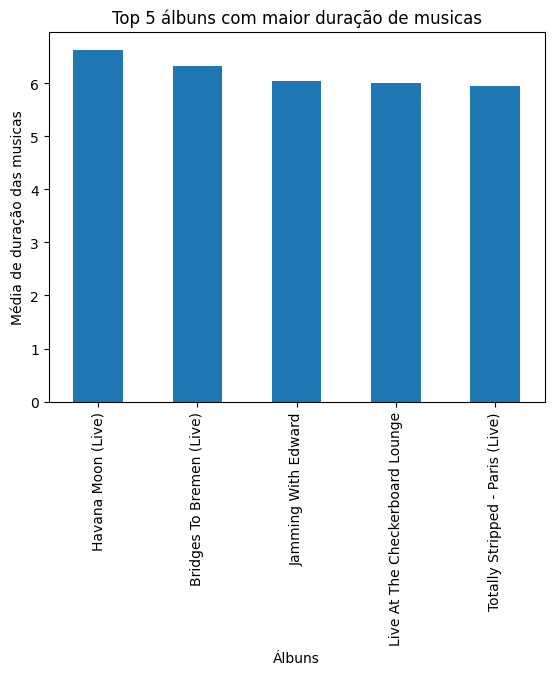

In [ ]:
df_maior_duracao_musica = df.groupby('album')['duracao_em_min'].mean().sort_values(ascending=False)
df_maior_duracao_musica.head(5).plot(kind="bar")
plt.xlabel("Álbuns")
plt.ylabel("Média de duração das musicas")
plt.title("Top 5 álbuns com maior duração de musicas")
plt.show()

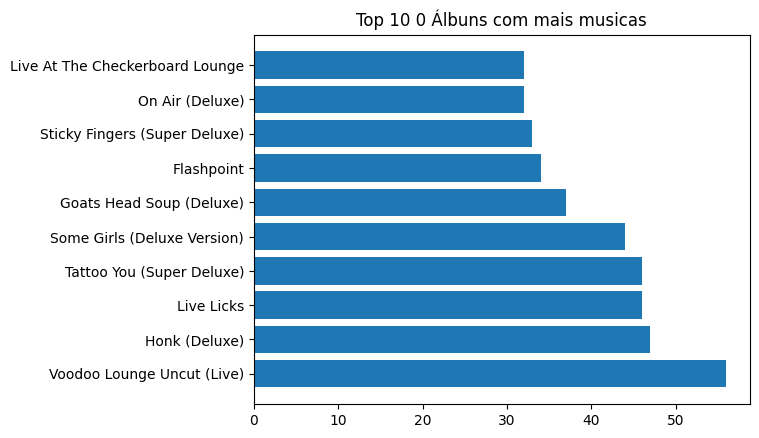

In [ ]:
top_albums = df["album"].value_counts().head(10)
plt.barh(top_albums.index, top_albums.values)
plt.title("Top 10 0 Álbuns com mais musicas")
plt.show()

In [ ]:
df_ultima_decada = df[df["release_date"].between(pd.to_datetime("2011"), pd.to_datetime("2020"))]

In [ ]:
df_por_album = df_ultima_decada.groupby("album")\
    ["popularity"].sum().sort_values(ascending=False).head(10)

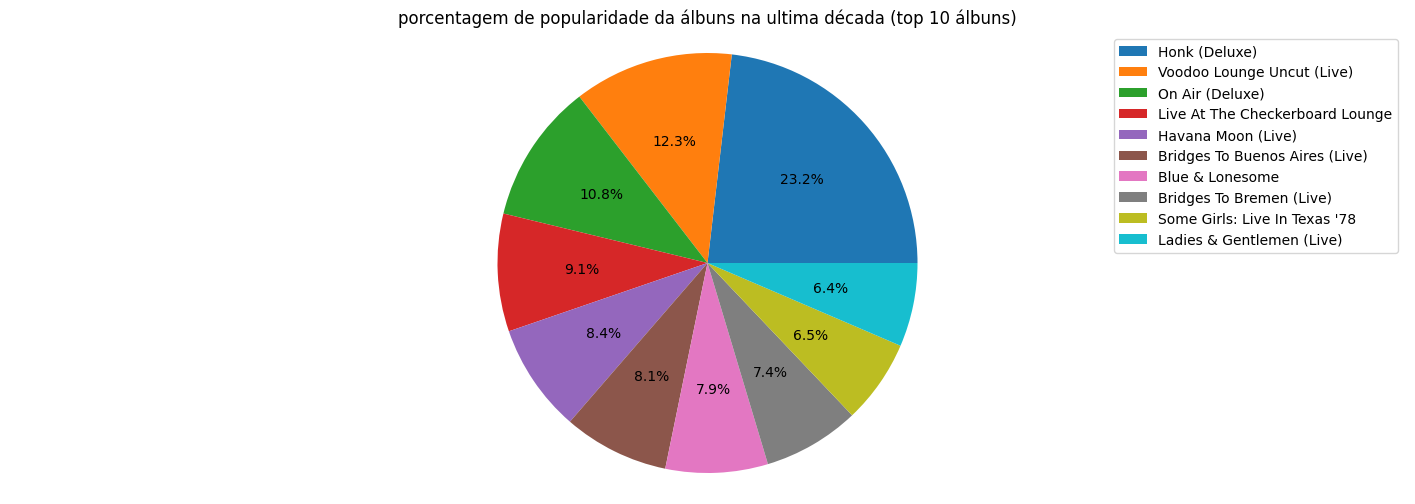

In [ ]:
total_popularidade = df_por_album.sum()
df_porcentagem = df_por_album / total_popularidade * 100
labels = df_porcentagem.index.tolist()
sizes = df_porcentagem.values.tolist()

figura, grafico = plt.subplots(figsize=(18, 6))
grafico.pie(sizes, autopct="%1.1f%%")
grafico.axis('equal')
plt.title("porcentagem de popularidade da álbuns na ultima década (top 10 álbuns)")
plt.legend(labels, loc='best')
plt.show()

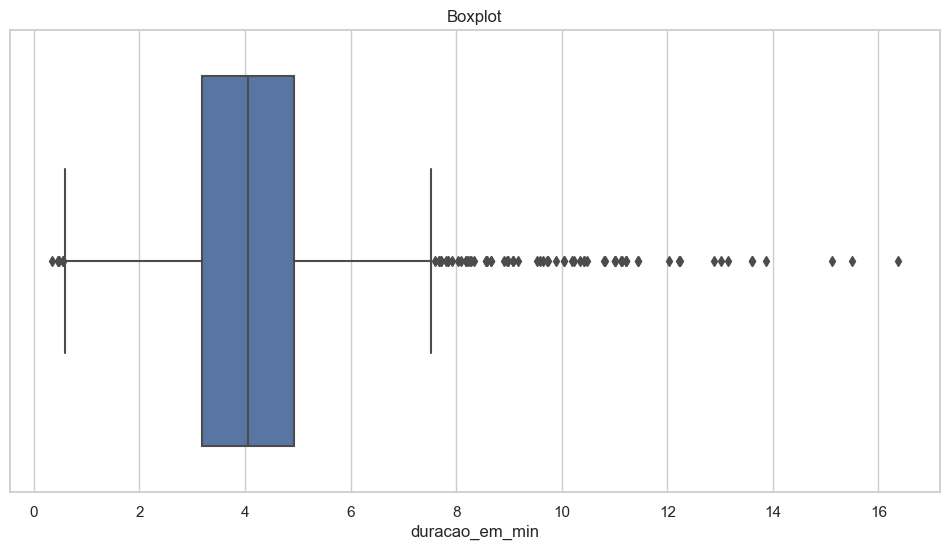

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(figsize=(12, 6))
sns.boxplot(x="duracao_em_min", data=df)
axes.set_title("Boxplot")
plt.show()

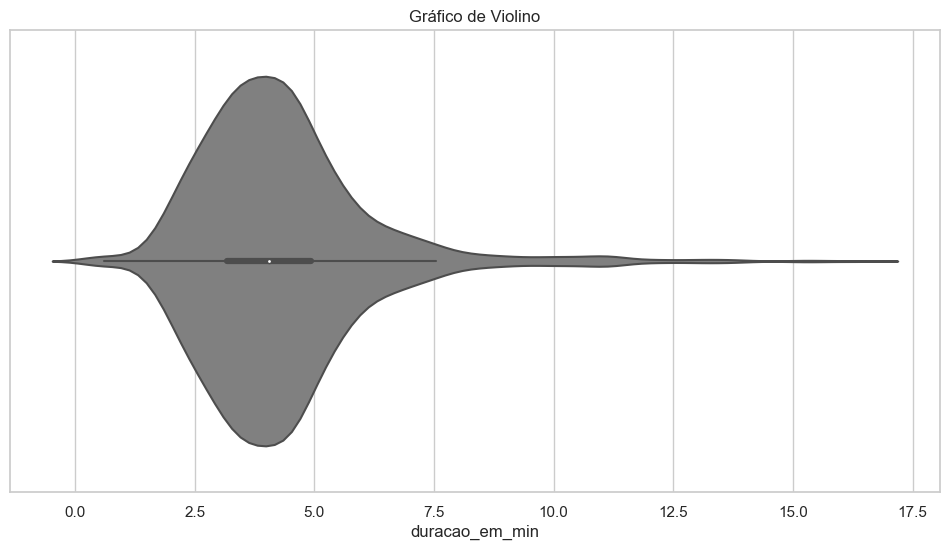

In [ ]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.violinplot(x="duracao_em_min", data=df, color="gray")
axes.set_title("Gráfico de Violino")
plt.show()

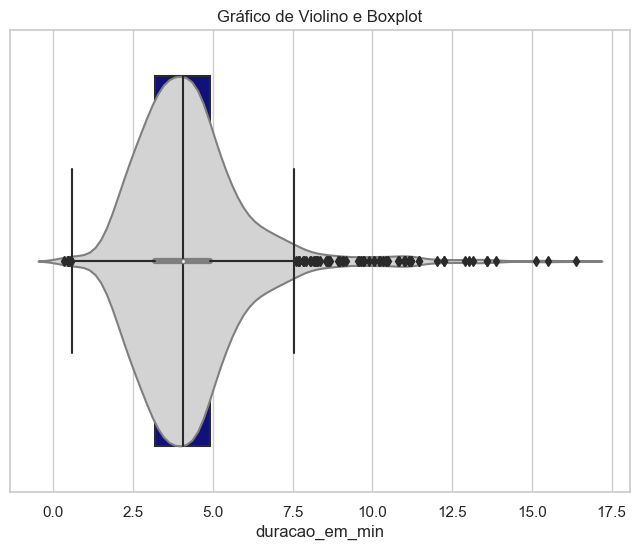

In [ ]:
fig, axes = plt.subplots(figsize=(8, 6))
sns.violinplot(x="duracao_em_min", data=df, ax=axes, color="lightgray")
sns.boxplot(x="duracao_em_min", data=df, ax=axes, whis=1.5, color="darkblue")
axes.set_title("Gráfico de Violino e Boxplot")
plt.show()

In [ ]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [ ]:
def classifica_musica_ao_vivo(df):
    if df["liveness"] >= 0.8:
        return True
    else:
        return False

In [ ]:
df["ao_vivo"] = df.apply(classifica_musica_ao_vivo, axis=1)

In [ ]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min,ao_vivo
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000,True
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000,True
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100,True


In [ ]:
df.groupby("ao_vivo")["ao_vivo"].count()

ao_vivo
False    1112
True      498
Name: ao_vivo, dtype: int64

In [ ]:
df_gravado_em_studio = df[df["ao_vivo"] == False]
df_show_ao_vivo = df[df["ao_vivo"] == True]

In [ ]:
print("Média das musicas ao vivo: ", df_show_ao_vivo["duracao_em_min"].mean())
print("Média das musicas em studio: ", df_gravado_em_studio["duracao_em_min"].mean())

Média das musicas ao vivo:  5.088648962516734
Média das musicas em studio:  3.940451363908873


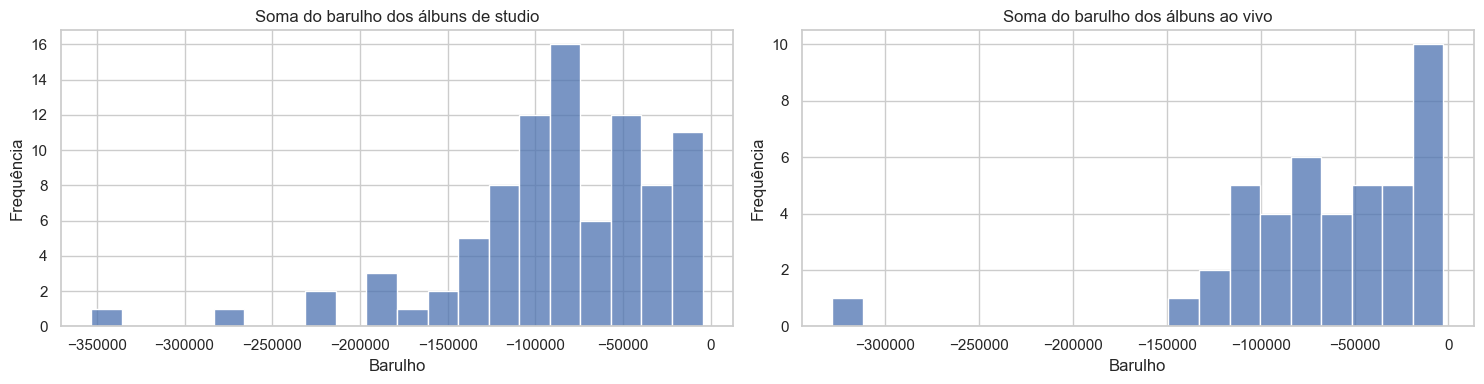

In [ ]:
df_studio = df_gravado_em_studio.groupby("album")["loudness"].sum()
df_ao_vivo = df_show_ao_vivo.groupby("album")["loudness"].sum()

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(data=df_studio, bins=20, ax=axes[0])
axes[0].set_title("Soma do barulho dos álbuns de studio")
axes[0].set_xlabel("Barulho")
axes[0].set_ylabel("Frequência")

sns.histplot(data=df_ao_vivo, bins=20, ax=axes[1])
axes[1].set_title("Soma do barulho dos álbuns ao vivo")
axes[1].set_xlabel("Barulho")
axes[1].set_ylabel("Frequência")

fig.tight_layout()
plt.show()

In [ ]:
df_studio

<function matplotlib.pyplot.legend(*args, **kwargs)>

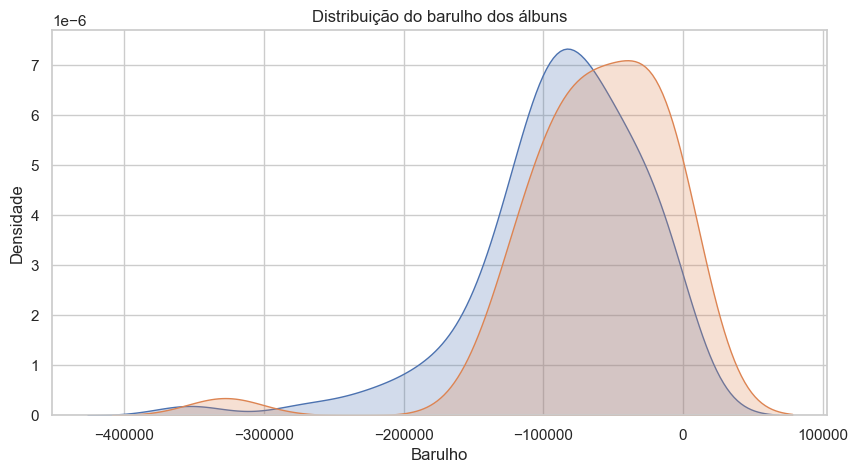

In [111]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_studio, label="Albuns de studio", fill=True)
sns.kdeplot(data=df_ao_vivo, label="Albuns ao vivo", fill=True)
plt.title("Distribuição do barulho dos álbuns")
plt.xlabel("Barulho")
plt.ylabel("Densidade")
plt.legend

> Teste de Hipótese
---
\
Os testes de hipóteses, envolve a formulação de duas hipóteses, onde basicamente queremos confirmar a veracidade entre as diferenças das informações. Para criarmos esse teste, primeiramente precisamos uma hipótese nula(támbem chamada de H0) e a hipótese alternativa(chamado de H1), a seguir precisamos pegar amostras aleatórias em cima de nossos valores e tentar comprovar de forma estatística que nossa hipótese nula é a afirmação que queremos fazer sobre a alternativa.

Vamos realizar esse teste para ver se de fato os albuns gravados em studio possuem menos barulho do que os ao-vivo. Para isso precisamos escolher algum dos vários testes que existem pela literatura estatística. Para podermos escolher o melhor e mais adequeado a nossos dados, podemos primeira verificar como está nossa distribuição, pois dependendo se ela não tende ser uma distribuição normal (também chamada de distribuição Gaussiana) precisamos aplicar outras técnicas de normalização em cima dos dados e também outros testes para comprovarmos sem nenhum enviesamento. 

> Teste de Shapiro-Wilk
---
\
O teste de Shapiro-Wilk é um teste de hipótese que verifica se uma amostra de dados segue uma distribuição normal. A hipótese nula do teste é que a amostra segue uma distribuição normal. Se o valor-p (valor de probabilidade) do teste for menor do que o nível de significância escolhido (geralmente 0,05), a hipótese nula é rejeitada e conclui-se que a amostra não segue uma distribuição normal.

É importante lembrar que apesar que tais testes são úteis para verificarmos nossa amostra segue uma distribuição normal, eles possuem suas limitações e devem ser usados de forma cautelosa sempre respeitando seus teoremas, é importante verificarmos visualmente a distribuição/densidade dos dados e considerar o contexto tambem.

In [112]:
# teste da significância estatística (testes paramétricos)

stat, p = shapiro(df_studio)
print("Soma do barulho dos albuns de studio: ")
print("Estatistica de teste: {:.4f}, valor p: {}".format(stat, p))

if p > 0.05:
    print("Nao ha evidencia suficiente para rejeitar a hipótese de normalidade")
else:
    print("A hipótese de normalidade é rejeitada")

stat, p = shapiro(df_ao_vivo)
print("Soma do barulho dos albuns ao vivo: ")
print("Estatistica de teste: {:.4f}, valor p: {}".format(stat, p))

if p > 0.05:
    print("Nao ha evidencia suficiente para rejeitar a hipótese de normalidade")
else:
    print("A hipótese de normalidade é rejeitada")

Soma do barulho dos albuns de studio: 
Estatistica de teste: 0.8958, valor p: 3.2960281259875046e-06
A hipótese de normalidade é rejeitada
Soma do barulho dos albuns ao vivo: 
Estatistica de teste: 0.7913, valor p: 2.3505581339122728e-06
A hipótese de normalidade é rejeitada


Okay! Entendemos que nossos dados não seguem uma distribuição normal, então não podemos realizar testes de hipóteses que seguem esse princípio, também chamados de testes não paramétricos.
> Teste não paramétrico Mann-Whitney U
---
\
O teste de Mann-Whitney U é um teste estatístico que compara duas amostras para determinar se elas têm distribuições diferentes. Ele classifica as observações de cada amostra(ou seja ordená-las em uma determinada ordem com base nos valores que representam), soma as classificações em cada amostra e compara as somas para obter um valor U. Se esse valor for grande o suficiente, podemos concluir que as médias das duas amostras são significativamente diferentes. Em resumo, o teste de Mann-Whitney U é usado para verificar se duas amostras são estatisticamente diferentes entre si, mesmo que elas não sigam uma distribuição normal.

In [113]:
# teste de distribuições parecidas (testes não paramétricos)

stat, p = mannwhitneyu(df_studio.sample(len(df_studio)), df_ao_vivo.sample(len(df_ao_vivo)), alternative="less")
print("Estatística de teste U: ", stat)
print("Valor p: ", p)
alpha = 0.05

if p < alpha:
    print("Diferença estatisticamente significante")
else:
    print("Não há diferença estatisticamente significante")

Estatística de teste U:  1367.0
Valor p:  0.0050727361177996585
Diferença estatisticamente significante


In [114]:
# Correlação

media_por_album = df.groupby("album")["valence"].mean().reset_index()
media_por_album = media_por_album.rename(columns={"valence": "media_valence"})
media_por_album["sentimento"] = ["positivo" if v > 0.6 else "negativo" for v in media_por_album["media_valence"]]
media_por_album.groupby("sentimento")["sentimento"].count()

sentimento
negativo    38
positivo    52
Name: sentimento, dtype: int64

In [115]:
df_resultado_final = pd.merge(df, media_por_album, on="album")
df_resultado_final.head(3)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duracao_em_min,ao_vivo,media_valence,sentimento
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True,0.27117,negativo
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True,0.27117,negativo
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000,True,0.27117,negativo


> Matriz de correlação
---
\
A matriz de correlação é uma tabela que mostra como as diferentes variáveis de um conjunto de dados se relacionam entre si. Cada número na tabela representa a medida de como duas variáveis estão associadas de forma linear, ou seja, quanto maior o número, maior será a associação matemática entre as variáveis. 

In [120]:
matriz_correlacao = df_resultado_final[['track_number',
                                        'acousticness', 
                                        'danceability',
                                        'energy',
                                        'instrumentalness',
                                        'liveness',
                                        'loudness',
                                        'speechiness',
                                        'tempo',
                                        'valence',
                                        'popularity',
                                        'duration_ms',
                                        'duracao_em_min',
                                        'ao_vivo',
                                        'media_valence'
                                    ]].corr()
correlacao_sentimento = matriz_correlacao['media_valence']
display(correlacao_sentimento)

track_number       -0.115007
acousticness        0.015491
danceability        0.492945
energy             -0.347447
instrumentalness    0.133741
liveness           -0.571749
loudness           -0.229543
speechiness        -0.416005
tempo              -0.028887
valence             0.603258
popularity          0.100509
duration_ms        -0.309499
duracao_em_min     -0.309499
ao_vivo            -0.549736
media_valence       1.000000
Name: media_valence, dtype: float64

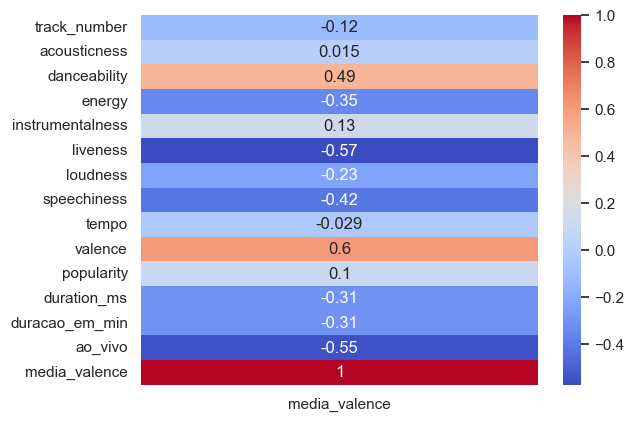

In [121]:
sns.heatmap(correlacao_sentimento.to_frame(), annot=True, cmap="coolwarm")
plt.show()

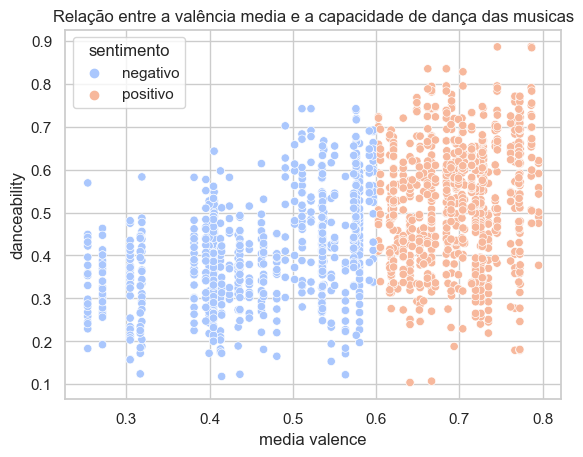

In [122]:
sns.scatterplot(x="media_valence", y="danceability", hue="sentimento", data=df_resultado_final, palette="coolwarm")
plt.xlabel("media valence")
plt.ylabel("danceability")
plt.title("Relação entre a valência media e a capacidade de dança das musicas")
plt.show()

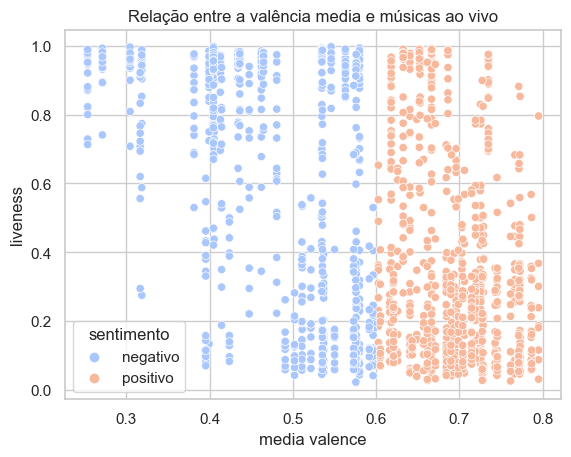

In [123]:
sns.scatterplot(x="media_valence", y="liveness", hue="sentimento", data=df_resultado_final, palette="coolwarm")
plt.xlabel("media valence")
plt.ylabel("liveness")
plt.title("Relação entre a valência media e músicas ao vivo")
plt.show()

## Aula 4 - Feature engineering

In [124]:
dados = pd.read_csv('../../../Data/Fase 2/data.csv', sep=',')

In [125]:
dados.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


<Axes: >

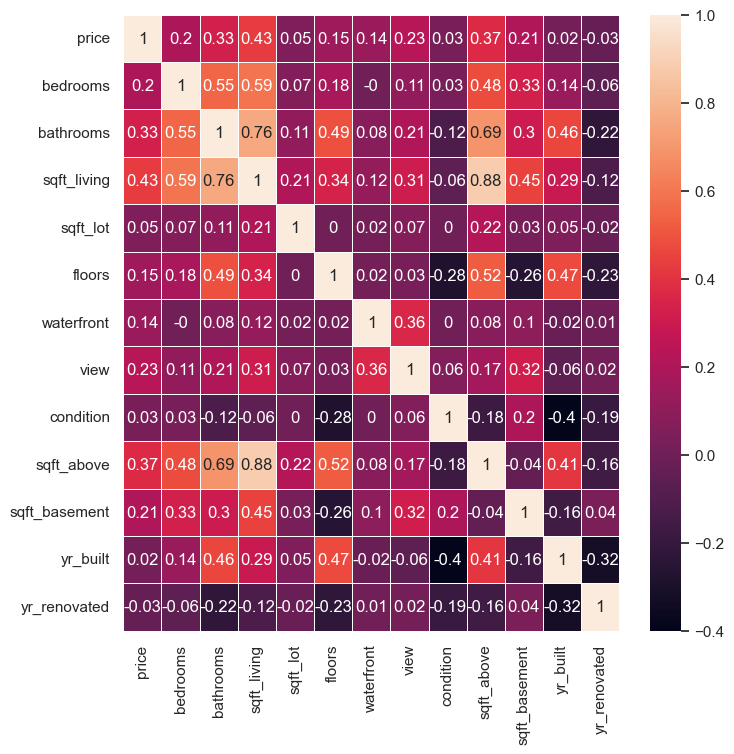

In [127]:
correlation_matrix = dados[['price',
                            'bedrooms', 
                            'bathrooms',
                            'sqft_living',
                            'sqft_lot',
                            'floors',
                            'waterfront',
                            'view',
                            'condition',
                            'sqft_above',
                            'sqft_basement',
                            'yr_built',
                            'yr_renovated'
                        ]].corr().round(2)
fig, ax = plt.subplots(figsize=(8, 8 ))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Vamos dar uma olhadinha nas variáveis sqft_living e bathrooms pois possuem uma correlação média em relação a variável target.

In [129]:
x = dados[["sqft_living", "bathrooms"]].values
y = dados["price"]

<Axes: xlabel='sqft_living', ylabel='price'>

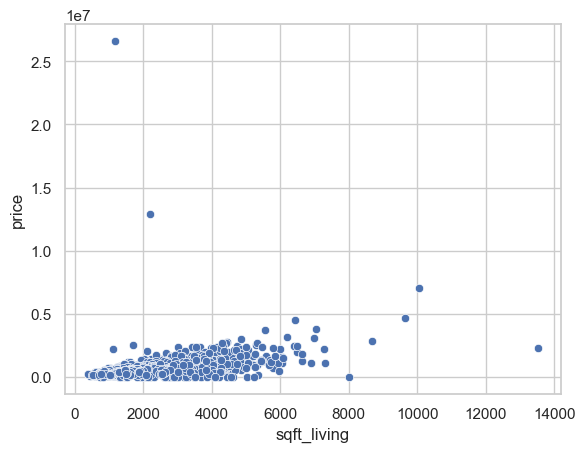

In [132]:
sns.scatterplot(data=dados, x="sqft_living", y="price")

<Axes: xlabel='bathrooms', ylabel='price'>

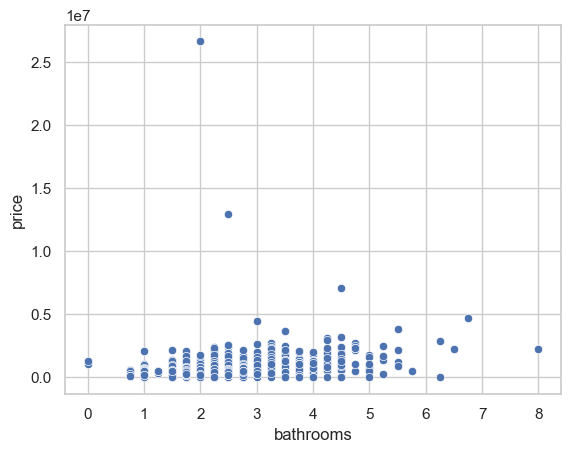

In [133]:
sns.scatterplot(data=dados, x="bathrooms", y="price")

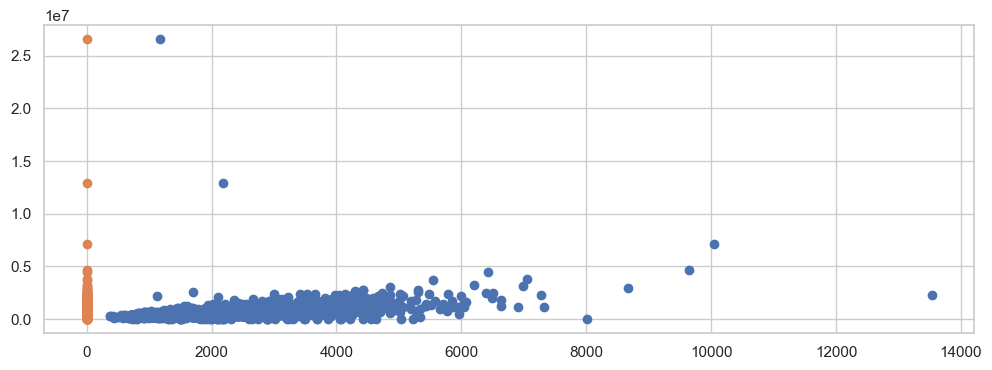

In [134]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(x[:,0], y)
ax.scatter(x[:,1], y)

<Axes: xlabel='sqft_living', ylabel='Count'>

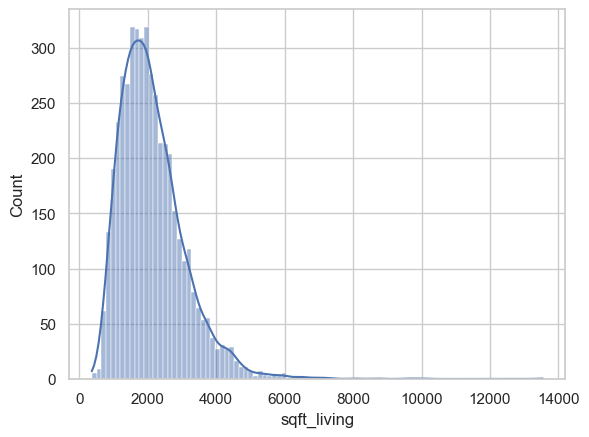

In [136]:
sns.histplot(data=dados, x="sqft_living", kde=True)

<Axes: xlabel='bathrooms', ylabel='Count'>

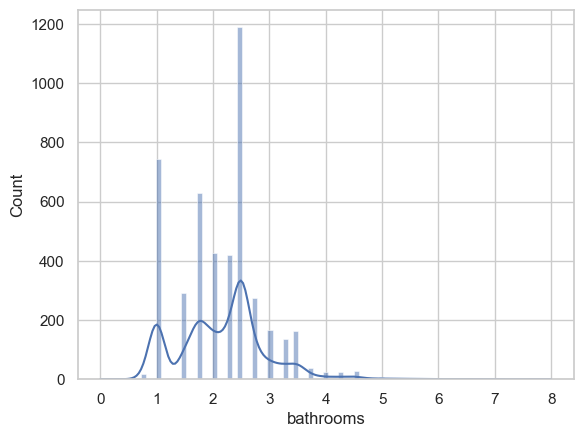

In [137]:
sns.histplot(data=dados, x="bathrooms", kde=True)

<Axes: >

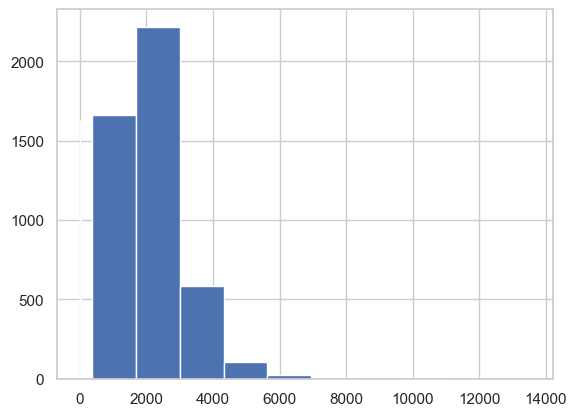

In [140]:
hist_variaveis= pd.DataFrame(dados, columns=["sqft_living", "bathrooms"])

hist_variaveis.sqft_living.hist()
hist_variaveis.bathrooms.hist()

<Axes: >

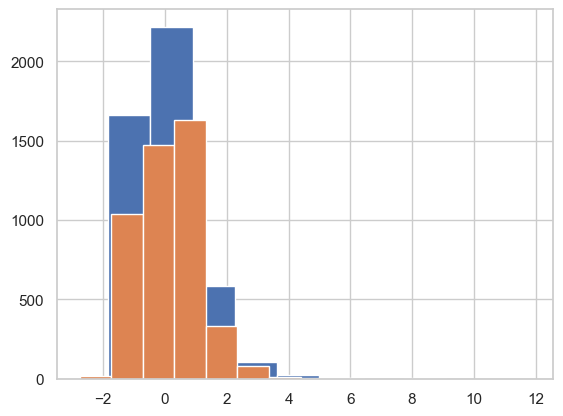

In [141]:
# Padronização
scalar = StandardScaler()
x_std = scalar.fit_transform(x)
x_std = pd.DataFrame(x_std, columns=["sqtf_living", "bathrooms"])
x_std.sqtf_living.hist()
x_std.bathrooms.hist()

In [152]:
x = dados[["sqft_living", "bathrooms"]].values
y = dados["price"].values

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 7)

In [154]:
len(x_train)

3450

In [155]:
len(x_test)

1150

 MinMaxScaler transforma cada característica em um novo intervalo entre 0 e 1, preservando a relação entre as diferentes características do conjunto de dados. Isso é feito subtraindo o valor mínimo de cada característica e dividindo pela amplitude (diferença entre o valor máximo e mínimo).

In [156]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [157]:
x_train

array([[2.400e+03, 3.250e+00],
       [1.954e+03, 2.500e+00],
       [2.620e+03, 2.750e+00],
       ...,
       [3.490e+03, 3.750e+00],
       [2.380e+03, 2.500e+00],
       [1.790e+03, 2.500e+00]])

In [158]:
x_train_scaled

array([[0.15349544, 0.40625   ],
       [0.11960486, 0.3125    ],
       [0.17021277, 0.34375   ],
       ...,
       [0.23632219, 0.46875   ],
       [0.15197568, 0.3125    ],
       [0.10714286, 0.3125    ]])

In [159]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [160]:
y_pred = model.predict(x_test_scaled)

In [165]:
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: ", MAE)
print("r²: ", r2)

MAE:  173536.74188212887
r²:  0.4605895596770161


In [166]:
model_normal = LinearRegression()
model_normal.fit(x_train, y_train)

LinearRegression()

In [167]:
y_pred_normal = model_normal.predict(x_test)


In [168]:
MAE = mean_absolute_error(y_test, y_pred_normal)
r2 = r2_score(y_test, y_pred_normal)
print("MAE: ", MAE)
print("r²: ", r2)

MAE:  173536.7418821289
r²:  0.4605895596770161


## Aula 5 - Avaliação de modelo de regressão

*   Flight: Número do voo.
*   Time: Horário de partida do voo.
*   Length: Duração do voo.
*   Airline: Nome do avião.
*   AirportFrom: Partida.
*   AirportTo: Destino.
*   DayOfWeek: Dia da semana
*  Class: Classe de atraso.

In [170]:
imoveis = pd.read_csv('../../../Data/Fase 2/Valorizacao_Ambiental.csv', sep=';')

In [171]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [172]:
imoveis.shape

(172, 10)

In [173]:
imoveis.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [174]:
imoveis.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


Text(0.5, 1.0, 'Histograma da variável valor')

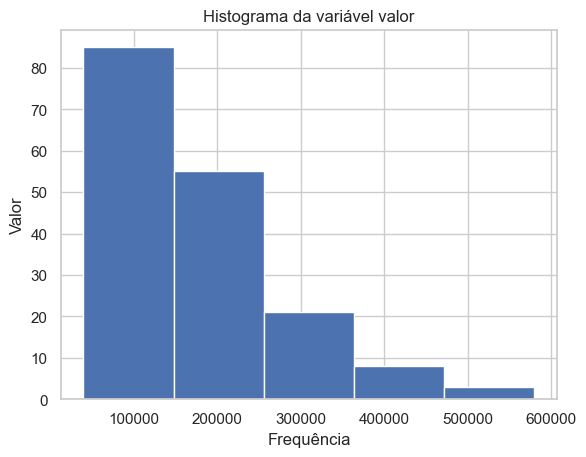

In [175]:
# Identificar a variável target

plt.hist(imoveis["Valor"], bins=5)
plt.xlabel("Frequência")
plt.ylabel("Valor")
plt.title("Histograma da variável valor")

In [176]:
imoveis["raiz_valor"] = np.sqrt(imoveis["Valor"])

Text(0.5, 1.0, 'Histograma da variável valor após raiz quadrada aplicada')

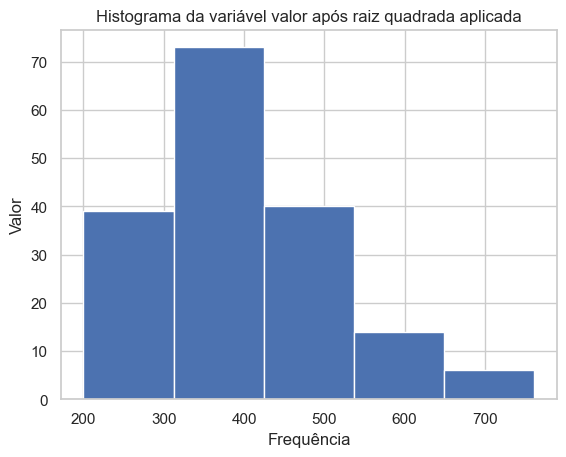

In [177]:
plt.hist(imoveis["raiz_valor"], bins=5)
plt.xlabel("Frequência")
plt.ylabel("Valor")
plt.title("Histograma da variável valor após raiz quadrada aplicada")

Text(0, 0.5, 'Qtd de suites')

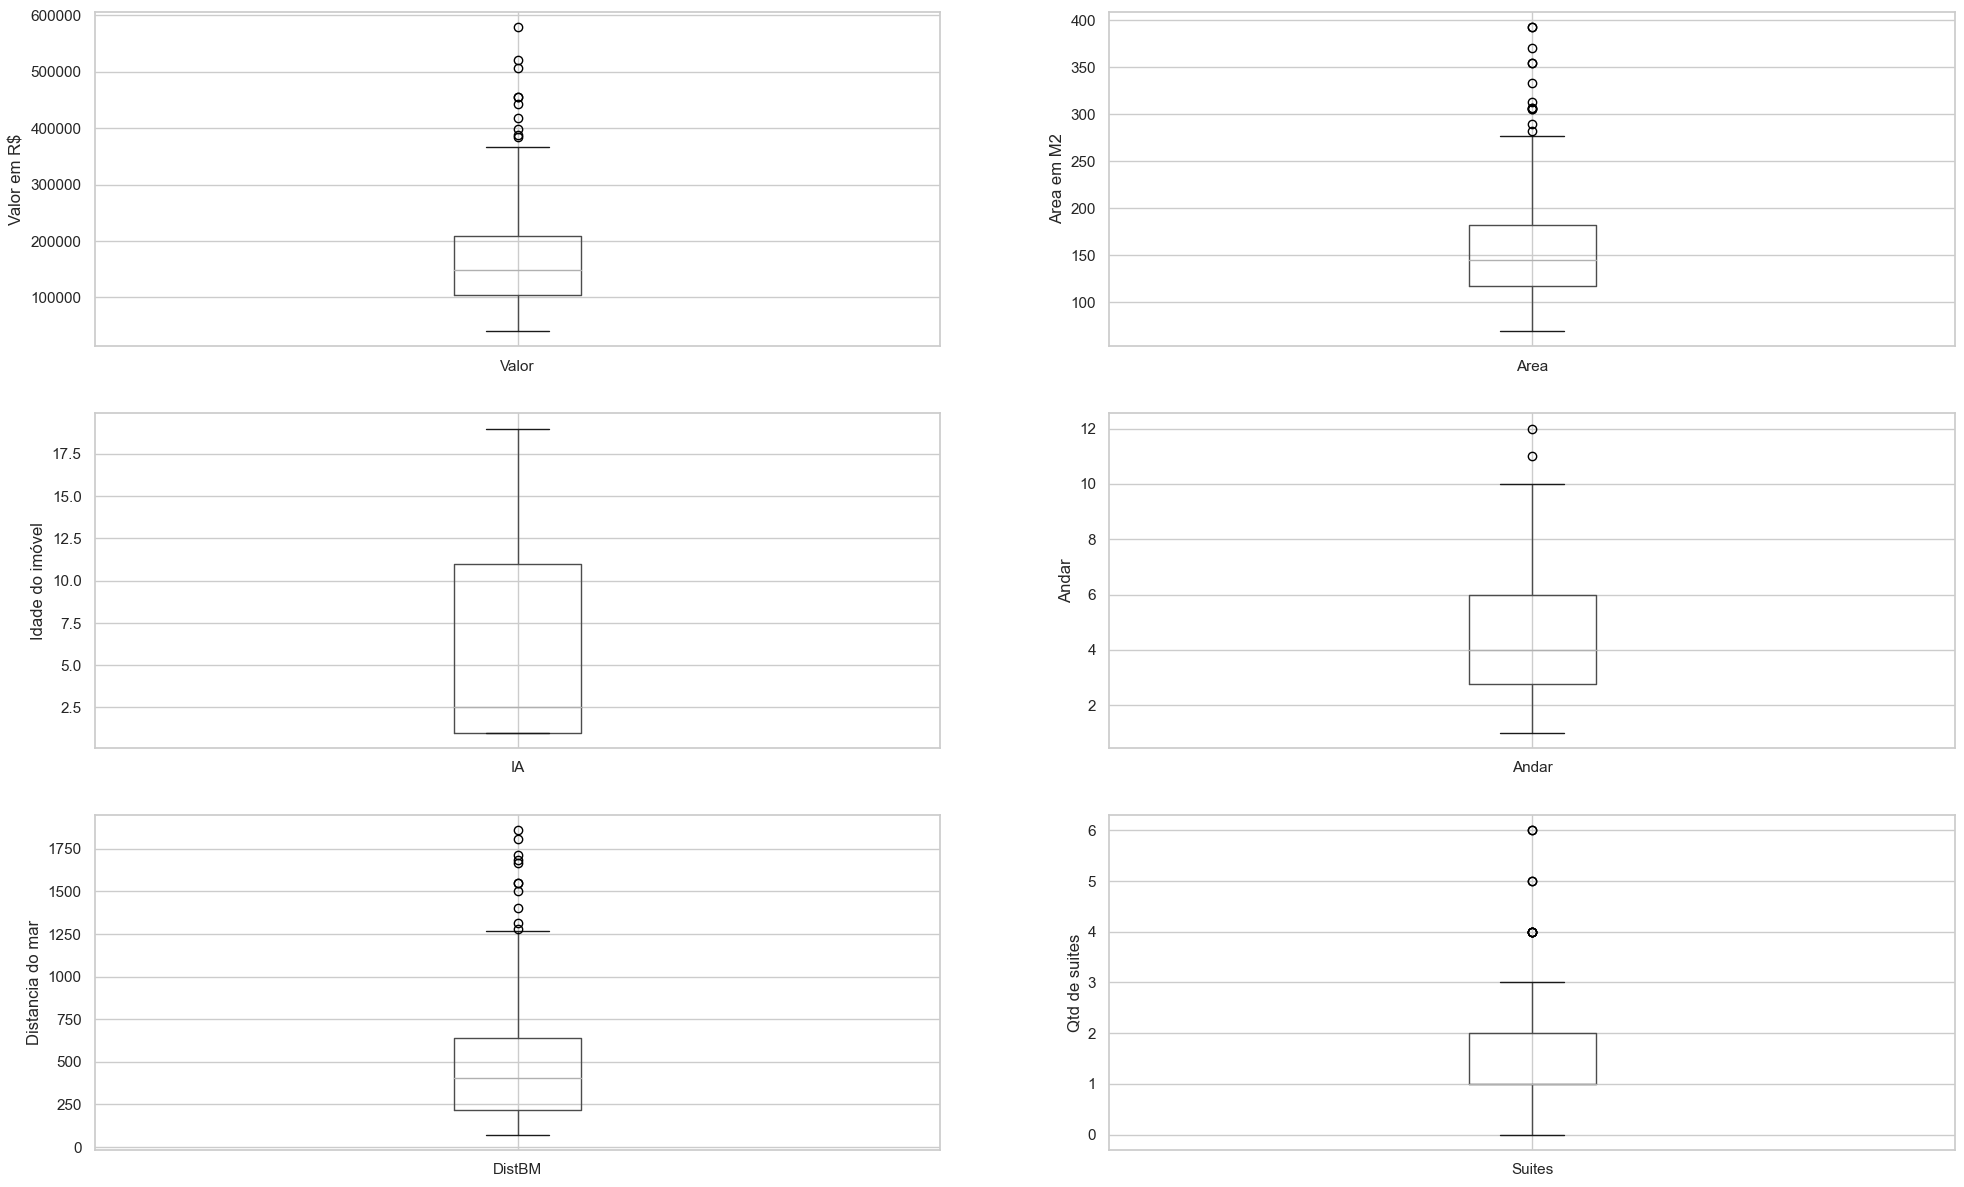

In [178]:
plt.figure(figsize=(24, 20))
plt.subplot(4, 2, 1)
fig = imoveis.boxplot(column="Valor")
fig.set_title("")
fig.set_ylabel("Valor em R$")
plt.subplot(4, 2, 2)
fig = imoveis.boxplot(column="Area")
fig.set_title("")
fig.set_ylabel("Area em M2")
plt.subplot(4, 2, 3)
fig = imoveis.boxplot(column="IA")
fig.set_title("")
fig.set_ylabel("Idade do imóvel")
plt.subplot(4, 2, 4)
fig = imoveis.boxplot(column="Andar")
fig.set_title("")
fig.set_ylabel("Andar")
plt.subplot(4, 2, 5)
fig = imoveis.boxplot(column="DistBM")
fig.set_title("")
fig.set_ylabel("Distancia do mar")
plt.subplot(4, 2, 6)
fig = imoveis.boxplot(column="Suites")
fig.set_title("")
fig.set_ylabel("Qtd de suites")

Analisando as correlaçãoes:

Correlação de Pearson - quando as variáveis são núméricas quantitativas
- ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
- ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
- ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
- ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
- ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

<Axes: >

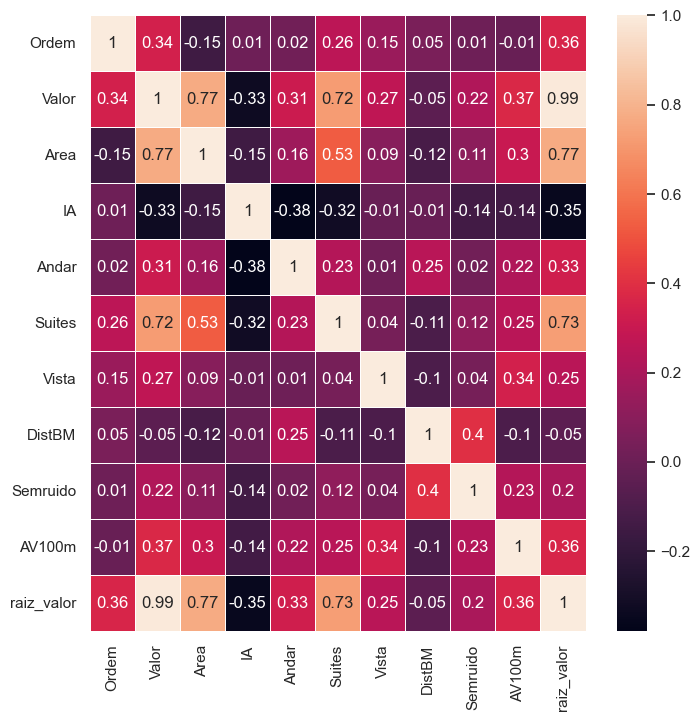

In [179]:
# correlação padrão de Pearson

correlation_matrix = imoveis.corr().round(2)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Text(0.5, 1.0, 'Area do imóvel x valor')

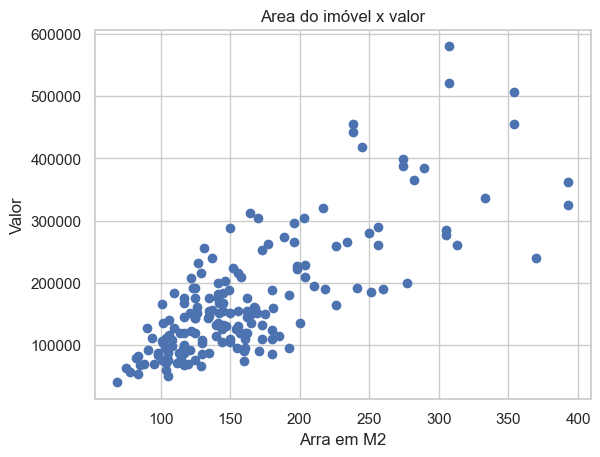

In [180]:
plt.scatter("Area", "Valor", data=imoveis)
plt.xlabel("Arra em M2")
plt.ylabel("Valor")
plt.title("Area do imóvel x valor")

Text(0.5, 1.0, 'Idade do imóvel x valor')

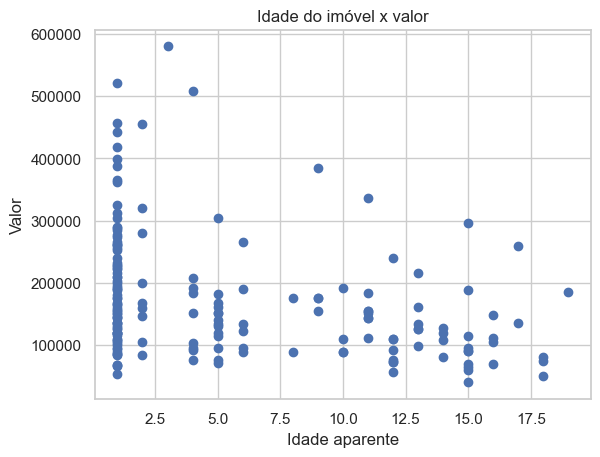

In [181]:
plt.scatter("IA", "Valor", data=imoveis)
plt.xlabel("Idade aparente")
plt.ylabel("Valor")
plt.title("Idade do imóvel x valor")

In [ ]:
# sns.parplot(imoveis)

<Axes: xlabel='Vista', ylabel='Valor'>

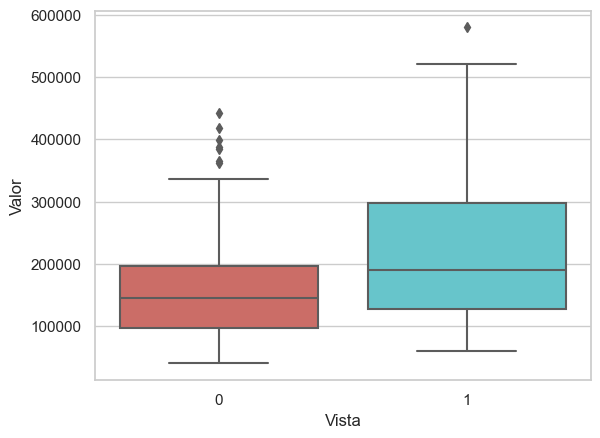

In [184]:
sns.boxplot(x='Vista', y='Valor', data=imoveis, palette='hls')

<Axes: xlabel='Semruido', ylabel='Valor'>

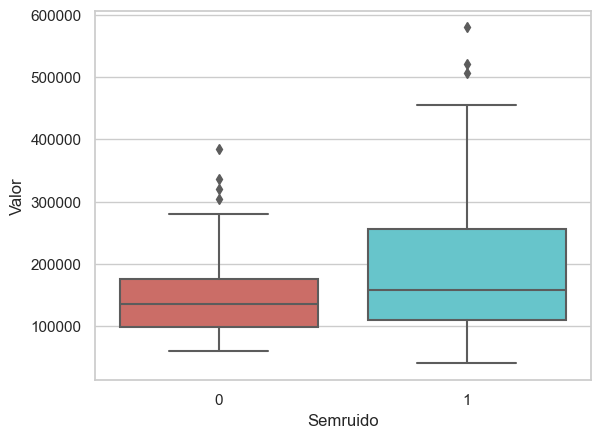

In [185]:
sns.boxplot(x='Semruido', y='Valor', data=imoveis, palette='hls')

<Axes: xlabel='AV100m', ylabel='Valor'>

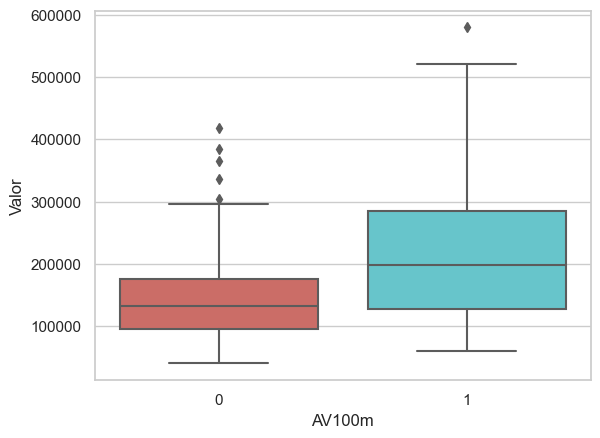

In [186]:
sns.boxplot(x='AV100m', y='Valor', data=imoveis, palette='hls')

/var/folders/b6/6gbr51r91pz6skgbf3cz9lvc0000gn/T/ipykernel_85105/3922820489.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(imoveis[(imoveis.AV100m == 1)]["Valor"],color='r',ax=ax)
/var/folders/b6/6gbr51r91pz6skgbf3cz9lvc0000gn/T/ipykernel_85105/3922820489.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

Text(0.5, 1.0, 'Distribuição do valor por tipo de Imovel')

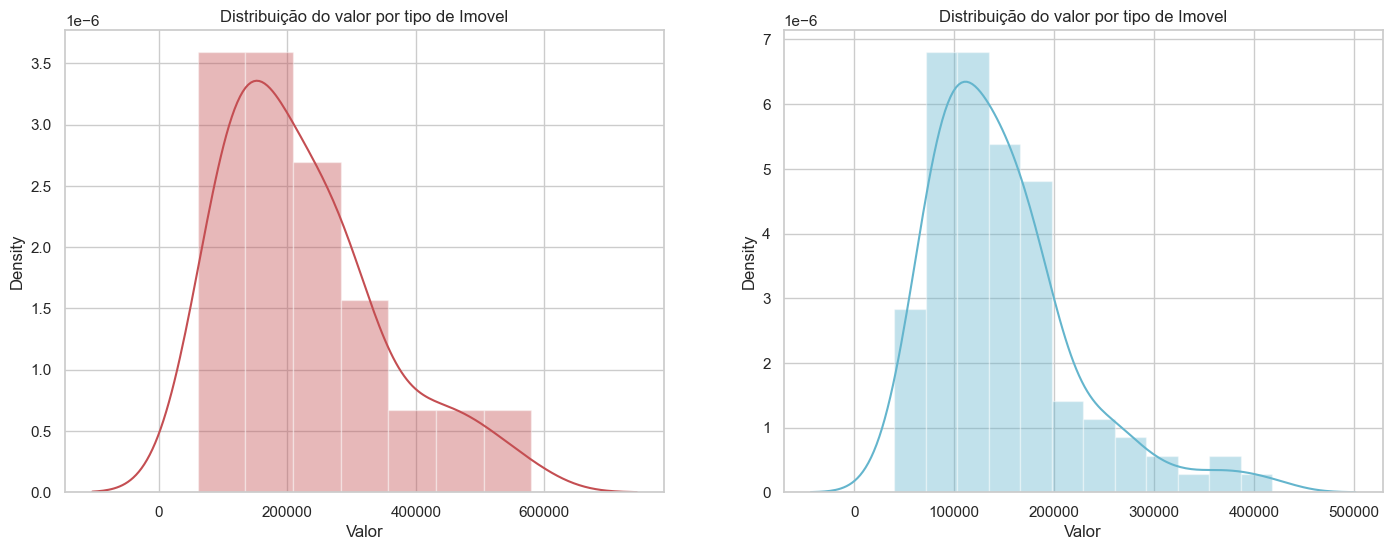

In [191]:
fig= plt.figure(figsize=(17,6))
ax=fig.add_subplot(121)
sns.distplot(imoveis[(imoveis.AV100m == 1)]["Valor"],color='r',ax=ax)
ax.set_title('Distribuição do valor por tipo de Imovel')
ax=fig.add_subplot(122)
sns.distplot(imoveis[(imoveis.AV100m == 0)]['Valor'],color='c',ax=ax)
ax.set_title('Distribuição do valor por tipo de Imovel')

### Realisando testes estatísticos:


Será que o valor é afetado por imóveis sem ruídos? Vamos comprovar com o teste estatístico Qui-Quadrado.

O teste Qui-Quadrado é uma técnica estatística utilizada para avaliar a associação entre duas variáveis categóricas em uma tabela de contingência.

Ele pode ser utilizado para testar a hipótese de que não há relação entre as duas variáveis ou para identificar se uma variável afeta a outra.

Nesse caso, estamos buscando descobrir a associação entre duas variáveis:  faixa valor (qualitativa ordinal) vs Semruido(qualitativa ordinal).

Para transformar a coluna de valor (quantitativa), vamos criar uma faixa de valores utilizando os quartis.




In [192]:
Q1 =  np.percentile(imoveis['Valor'], 25)
Q2 =  np.percentile(imoveis['Valor'], 50)
Q3 =  np.percentile(imoveis['Valor'], 75)
maximo = max(imoveis['Valor'])    
print(Q1, Q2, Q3, maximo)

104750.0 149000.0 209250.0 579840


In [193]:
imoveis.loc[(imoveis.Valor >= 0) & (imoveis.Valor <= Q1), 'fx_total']=1.0
imoveis.loc[(imoveis.Valor > Q1) & (imoveis.Valor <= Q2), 'fx_total']=2.0
imoveis.loc[(imoveis.Valor>  Q2)  & (imoveis.Valor <=Q3), 'fx_total']=3.0
imoveis.loc[(imoveis.Valor >  Q3) & (imoveis.Valor <= maximo), 'fx_total']=4.0

<Axes: xlabel='fx_total', ylabel='Valor'>

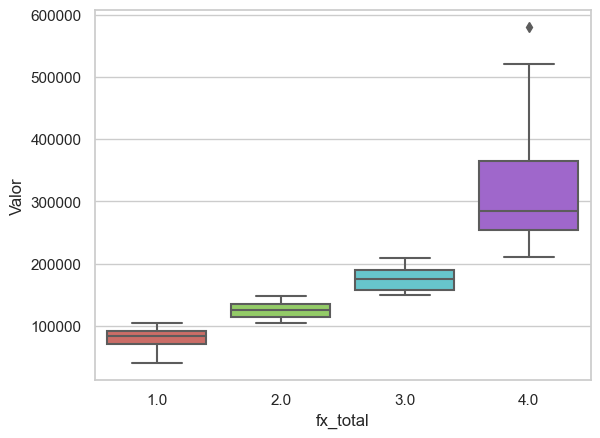

In [194]:
sns.boxplot(x='fx_total', y='Valor', data=imoveis, palette='hls')

In [195]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ordem       172 non-null    int64  
 1   Valor       172 non-null    int64  
 2   Area        172 non-null    int64  
 3   IA          172 non-null    int64  
 4   Andar       172 non-null    int64  
 5   Suites      172 non-null    int64  
 6   Vista       172 non-null    int64  
 7   DistBM      172 non-null    int64  
 8   Semruido    172 non-null    int64  
 9   AV100m      172 non-null    int64  
 10  raiz_valor  172 non-null    float64
 11  fx_total    172 non-null    float64
dtypes: float64(2), int64(10)
memory usage: 16.2 KB


In [196]:
# crosstab tabela cruzada entre duas variáveis qualitativas

pd.crosstab(imoveis.fx_total,imoveis.Semruido, margins=True)

Semruido,0,1,All
fx_total,,,
1.0,20,23,43
2.0,22,21,43
3.0,21,22,43
4.0,9,34,43
All,72,100,172


In [197]:
(imoveis.Semruido.value_counts() / imoveis.shape[0]) * 100

Semruido
1    58.139535
0    41.860465
Name: count, dtype: float64

In [198]:
table = pd.crosstab(imoveis.fx_total,imoveis.Semruido)

In [199]:
print(table)

Semruido   0   1
fx_total        
1.0       20  23
2.0       22  21
3.0       21  22
4.0        9  34


A função chi2_contingency calcula a estatística do qui-quadrado e o valor p para a tabela de contingência fornecida. A estatística do qui-quadrado é uma medida da discrepância entre a distribuição observada e a distribuição esperada sob a hipótese nula de independência das duas variáveis. O valor p é a probabilidade de obter uma estatística do qui-quadrado tão extrema quanto a observada, sob a hipótese nula.

Em geral, um valor de p menor que 0,05 (ou 0,01, dependendo do contexto) é frequentemente considerado como uma evidência forte contra a hipótese nula, e um valor de p maior que 0,10 geralmente é considerado como uma evidência fraca.

In [201]:
stat, p, dof, expected = chi2_contingency(table)
p

0.014685713198671485

####   Teste de hipótese:
    H0: não há relação entre valor e ruído
    H1: há relação entre valor e ruído
    α = 0,05 (5%)

In [202]:
print('Graus de liberdade: dof=%d' % dof)

print('\n Tabela Esperada:')
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)

print('\n probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
	print('\n Dependent (reject H0)')
else:
	print('\n Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('\n significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('\n Dependent (reject H0)')
else:
	print('\n Independent (fail to reject H0)')

Graus de liberdade: dof=3

 Tabela Esperada:
[[18. 25.]
 [18. 25.]
 [18. 25.]
 [18. 25.]]

 probability=0.950, critical=7.815, stat=10.511

 Dependent (reject H0)

 significance=0.050, p=0.015

 Dependent (reject H0)


In [205]:
results1 = researchpy.crosstab(imoveis['fx_total'],imoveis['Semruido'], test='chi-square')

In [206]:
results1

(         Semruido          
 Semruido        0    1  All
 fx_total                   
 1.0            20   23   43
 2.0            22   21   43
 3.0            21   22   43
 4.0             9   34   43
 All            72  100  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =   10.5111
 1                    p-value =    0.0147
 2                 Cramer's V =    0.2472)

In [207]:
results2 = researchpy.crosstab(imoveis['fx_total'],imoveis['Vista'], test='chi-square')

In [208]:
results2

(         Vista         
 Vista        0   1  All
 fx_total               
 1.0         41   2   43
 2.0         36   7   43
 3.0         39   4   43
 4.0         32  11   43
 All        148  24  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =    8.9099
 1                    p-value =    0.0305
 2                 Cramer's V =    0.2276)

In [209]:
results3 = researchpy.crosstab(imoveis['fx_total'],imoveis['AV100m'], test='chi-square')

In [210]:
results3

(         AV100m         
 AV100m        0   1  All
 fx_total                
 1.0          36   7   43
 2.0          30  13   43
 3.0          31  12   43
 4.0          15  28   43
 All         112  60  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =   25.1857
 1                    p-value =    0.0000
 2                 Cramer's V =    0.3827)

In [211]:
# Avaliando a variável Distancia do Imovel do Mar
Q1 =  np.percentile(imoveis['DistBM'], 25)
Q2 =  np.percentile(imoveis['DistBM'], 50)
Q3 =  np.percentile(imoveis['DistBM'], 75)
maximo = max(imoveis['DistBM' ])    
print(Q1, Q2, Q3, maximo)

214.75 402.5 638.0 1859


In [212]:
imoveis.loc[(imoveis.DistBM >= 0) & (imoveis.DistBM <= Q1), 'fx_DistBM']=1.0
imoveis.loc[(imoveis.DistBM > Q1) & (imoveis.DistBM <= Q2), 'fx_DistBM']=2.0
imoveis.loc[(imoveis.DistBM>  Q2)  & (imoveis.DistBM <=Q3), 'fx_DistBM']=3.0
imoveis.loc[(imoveis.DistBM >  Q3) & (imoveis.DistBM <= maximo), 'fx_DistBM']=4.0

<Axes: xlabel='fx_DistBM', ylabel='DistBM'>

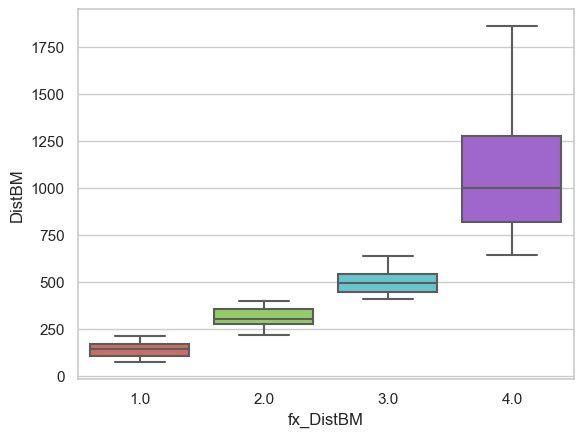

In [213]:
sns.boxplot(x='fx_DistBM', y='DistBM', data=imoveis, palette='hls')

In [214]:
results4 = researchpy.crosstab(imoveis['fx_total'],imoveis['fx_DistBM'], test='chi-square')

In [215]:
results4

(          fx_DistBM                 
 fx_DistBM       1.0 2.0 3.0 4.0  All
 fx_total                            
 1.0              12  10   7  14   43
 2.0              12  11   7  13   43
 3.0              12   9  13   9   43
 4.0               7  13  16   7   43
 All              43  43  43  43  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 9.0) =   11.2558
 1                    p-value =    0.2586
 2                 Cramer's V =    0.1477)

In [216]:
results5 = researchpy.crosstab(imoveis['fx_total'],imoveis['Area'], test='chi-square')

In [217]:
results5

(         Area                             ...                                  \
 Area       69 75 78 82 84 85 88 90 91 94  ... 282 289 305 307 313 333 354 370   
 fx_total                                  ...                                   
 1.0         1  1  1  1  2  1  1  0  1  0  ...   0   0   0   0   0   0   0   0   
 2.0         0  0  0  0  0  0  0  1  0  1  ...   0   0   0   0   0   0   0   0   
 3.0         0  0  0  0  0  0  0  0  0  0  ...   0   0   0   0   0   0   0   0   
 4.0         0  0  0  0  0  0  0  0  0  0  ...   1   1   2   2   1   1   2   1   
 All         1  1  1  1  2  1  1  1  1  1  ...   1   1   2   2   1   1   2   1   
 
                    
 Area     393  All  
 fx_total           
 1.0        0   43  
 2.0        0   43  
 3.0        0   43  
 4.0        2   43  
 All        2  172  
 
 [5 rows x 101 columns],
                   Chi-square test   results
 0  Pearson Chi-square ( 297.0) =   351.7143
 1                      p-value =     0.0159
 2          

In [218]:
results6 = researchpy.crosstab(imoveis['fx_total'],imoveis['IA'], test='chi-square')

In [219]:
results6

(          IA                                                          
 IA         1  2  3  4   5  6  8  9 10 11 12 13 14  15 16 17 18 19  All
 fx_total                                                              
 1.0       12  1  0  4   3  2  1  0  2  0  5  1  1   7  1  0  3  0   43
 2.0       17  2  0  0   5  2  0  0  1  3  2  3  3   1  3  1  0  0   43
 3.0       18  3  0  4   5  1  1  3  1  4  0  1  0   1  0  0  0  1   43
 4.0       30  3  1  1   1  1  0  1  0  1  1  1  0   1  0  1  0  0   43
 All       77  9  1  9  14  6  2  4  4  8  8  6  4  10  4  2  3  1  172,
                  Chi-square test  results
 0  Pearson Chi-square ( 51.0) =   83.5763
 1                     p-value =    0.0027
 2                  Cramer's V =    0.4025)

In [220]:
results7 = researchpy.crosstab(imoveis['fx_total'],imoveis['Andar'], test='chi-square')

In [221]:
results7

(         Andar                                           
 Andar        1   2   3   4   5   6  7  8  9 10 11 12  All
 fx_total                                                 
 1.0          9  10   9   2   7   3  2  0  1  0  0  0   43
 2.0          3  12   7   4   6   4  3  1  2  1  0  0   43
 3.0          0   6   9   6   7  10  1  2  1  0  0  1   43
 4.0          0   3   7   8   8   8  1  6  1  0  1  0   43
 All         12  31  32  20  28  25  7  9  5  1  1  1  172,
                  Chi-square test  results
 0  Pearson Chi-square ( 33.0) =   54.7097
 1                     p-value =    0.0102
 2                  Cramer's V =    0.3256)

In [222]:
lr = LinearRegression()
X = imoveis[['Area','Suites', 'IA', 'Semruido', 'Vista', 'Andar','AV100m','DistBM']]
y = imoveis[['Valor']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)
lr.fit(X_train,y_train)

LinearRegression()

In [223]:
y_pred = lr.predict(X_test)

In [225]:
r_sq = lr.score(X, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.8060354276078826


In [224]:
print('Intercepto: ', lr.intercept_)

Intercepto:  [-40165.87527731]


In [226]:
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(lr.coef_))], axis=1)
coefficients

,0,0
0,Area,815.218075
1,Suites,34315.785459
2,IA,-1052.417100
3,Semruido,17027.508944
4,Vista,63486.030935
5,Andar,5635.237485
6,AV100m,-5672.535051
7,DistBM,-2.522530


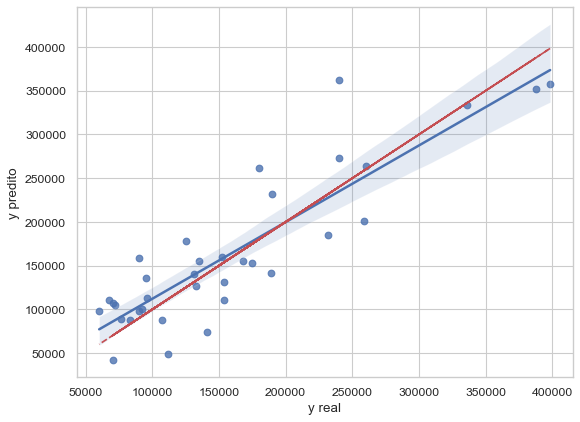

In [227]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.rcParams.update({'font.size': 14})
ax = sns.regplot(x=y_test, y=y_pred)
ax.set(xlabel='y real', ylabel='y predito')
ax = plt.plot(y_test, y_test, '--r')
plt.show()

In [228]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE", MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos error
print("MSE", MSE) # Mean Squared Error (MSE) é a média dos erros quadráticos
print("r²", r2) # (R-quadrado)

MAE 34422.98857094525
MSE 1844288772.1789265
r² 0.7584591969125112


In [229]:
model_dtr = DecisionTreeRegressor(random_state=7, max_depth=10)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=7)

In [230]:
y_pred_model_dtr = model_dtr.predict(X_test)

In [231]:
MAE = mean_absolute_error(y_test, y_pred_model_dtr)
MSE = mean_squared_error(y_test, y_pred_model_dtr)
r2 = r2_score(y_test, y_pred_model_dtr)
print("MAE", MAE)
print("MSE", MSE)
print("r²", r2)

MAE 39338.92244897959
MSE 2532451627.6991253
r² 0.6683326336081382


In [232]:
svr = SVR(kernel='linear')

In [233]:
svr.fit(X_train, y_train)

/Users/marcelocardoso/Documents/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [234]:
y_pred_svr = svr.predict(X_test)

In [235]:
MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)
print("MAE", MAE)
print("MSE", MSE)
print("r²", r2)

MAE 43153.53918496288
MSE 3123421996.7782364
r² 0.5909350700044546


## Aula 6 - Limitações e os modelos de classificação

In [236]:
df = pd.read_csv('../../../Data/Fase 2/airlines.csv', sep=',')

In [237]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [238]:
df.shape

(539382, 8)

In [239]:
df.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [ ]:
# df = df.dropna()

In [240]:
duplicated_cols = []
for col in df.columns:
    if df[col].duplicated().any():
        duplicated_cols.append(col)
print(duplicated_cols)

['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Class']


In [241]:
df.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


Inferência:

*  Média de duração de voos é de 133
*  Desvio padrão: 70

Se o desvio padrão é baixo em relação à média, isso significa que a maioria dos valores estão próximos da média e que os dados estão mais concentrados em torno da média.  

Vamos dar uma olhadinha nos gráficos:



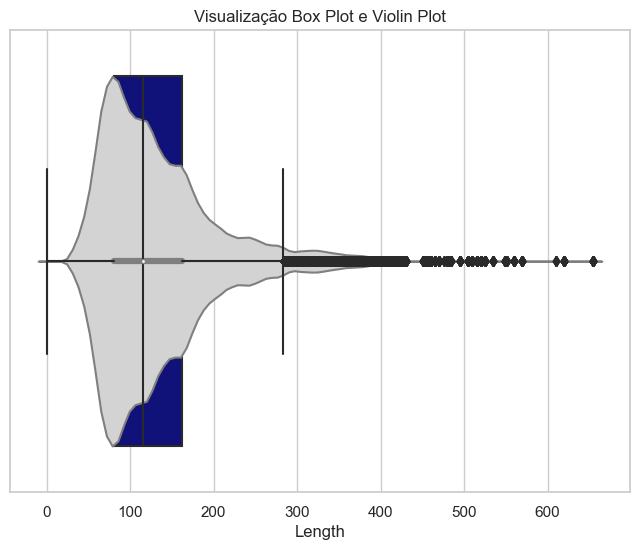

In [243]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x='Length', data=df, ax=ax, color='lightgray')
sns.boxplot(x='Length', data=df, ax=ax, whis=1.5, color='darkblue')
ax.set_title('Visualização Box Plot e Violin Plot')
plt.show()

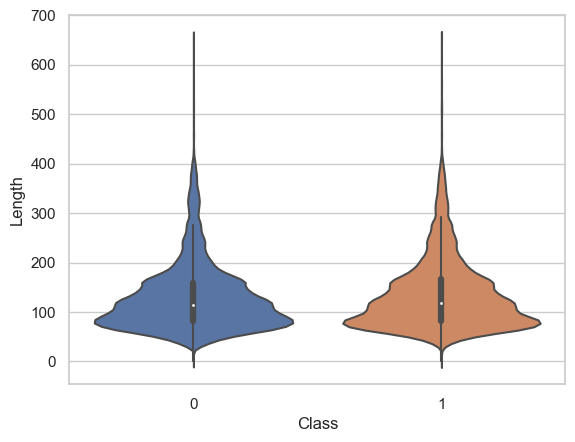

In [244]:
sns.violinplot(x='Class', y='Length', data=df)
plt.show()

In [246]:
atraso_voo = df.groupby('Class')
atraso_voo.describe().T

Class                        0              1
Flight    count  299118.000000  240264.000000
          mean     2513.484842    2321.413508
          std      2102.883185    2017.368082
          min         1.000000       1.000000
          25%       725.000000     701.000000
          50%      1924.000000    1695.000000
          75%      3931.000000    3408.000000
          max      7812.000000    7814.000000
Time      count  299118.000000  240264.000000
          mean      765.235138     849.405308
          std       283.712464     263.472137
          min        10.000000      10.000000
          25%       515.000000     640.000000
          50%       735.000000     860.000000
          75%       998.000000    1060.000000
          max      1439.000000    1439.000000
Length    count  299118.000000  240264.000000
          mean      129.657760     135.369697
          std        68.693953      71.723475
          min         0.000000       0.000000
          25%        81.000000      82.000000
          50%       114.000000     118.000000
          75%       159.000000     166.000000
          max       655.000000     655.000000
DayOfWeek count  299118.000000  240264.000000
          mean        3.974622       3.873697
          std         1.907565       1.922004
          min         1.000000       1.000000
          25%         2.000000       2.000000
          50%         4.000000       4.000000
          75%         5.000000       5.000000
          max         7.000000       7.000000

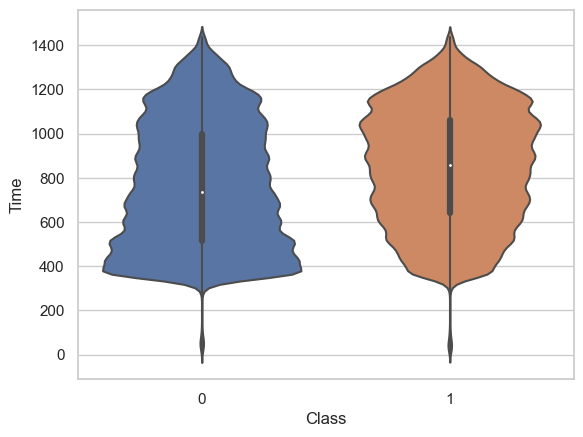

In [247]:
sns.violinplot(x='Class', y='Time', data=df)
plt.show()

<Axes: xlabel='Airline', ylabel='count'>

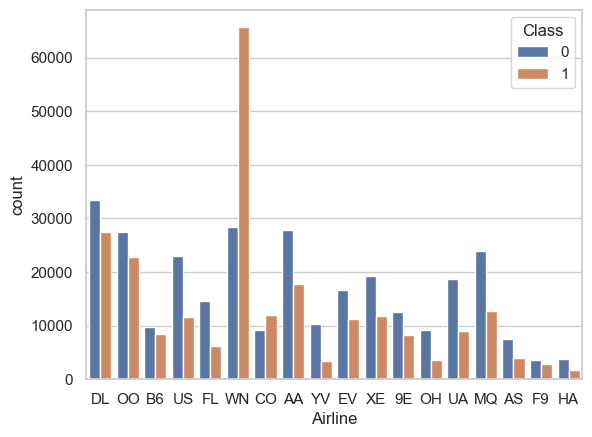

In [248]:
sns.countplot(x='Airline', hue='Class', data=df)

<Axes: xlabel='DayOfWeek', ylabel='count'>

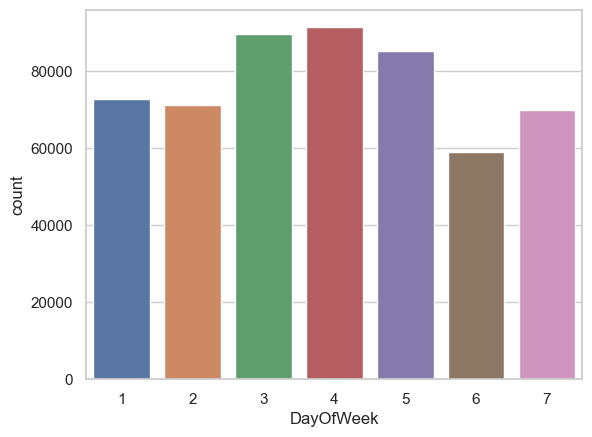

In [249]:
diaSemana = list(range(1, 8))
sns.countplot(x='DayOfWeek', data=df, order=diaSemana)

<Axes: xlabel='Class', ylabel='count'>

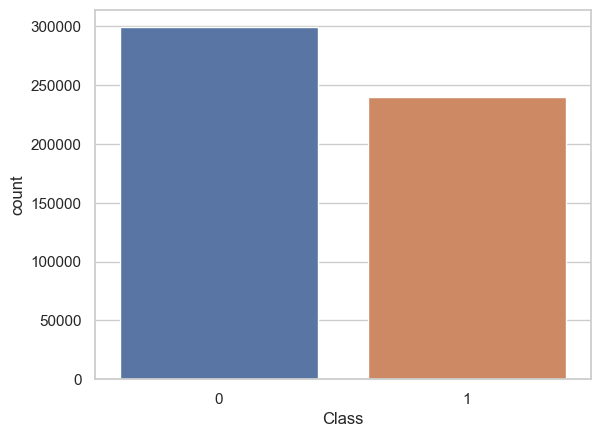

In [250]:
sns.countplot(x='Class', data=df)

In [251]:
df['AirportFrom'] = LabelEncoder().fit_transform(df['AirportFrom'])
df['AirportTo'] = LabelEncoder().fit_transform(df['AirportTo'])
df['Airline'] = LabelEncoder().fit_transform(df['Airline'])
df.head(3)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,5,16,129,1,0
1,6948.0,360.0,146.0,12,65,208,4,0
2,1247.0,1170.0,143.0,3,35,60,3,0


In [252]:
x = df[['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek']]
y = df['Class']

In [253]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

#### Criando o modelo de naive bayes
Naive Bayes é um algortimo  baseado no teorema de Bayes e na suposição de independência condicional entre atributos. 

O modelo Naive Bayes calcula a probabilidade condicional de uma determinada classe, dada uma entrada de dados ou conjunto de atributos, utilizando a regra de Bayes. 

Ele assume que os atributos de entrada são independentes entre si, ou seja, a presença ou ausência de um atributo não é afetada pela presença ou ausência de outro atributo



In [254]:
# Naive Bayes

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [255]:
y_pred_gnb = gnb.predict(x_test)

In [256]:
accuracy = accuracy_score(y_test, y_pred_gnb)
print('Accuracy: ', round(accuracy, 2))

Accuracy:  0.59


In [260]:
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 1]

In [261]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority),  random_state=7)

In [263]:
df_equilibrado = pd.concat([df_majority, df_minority_upsampled])

<Axes: xlabel='Class', ylabel='count'>

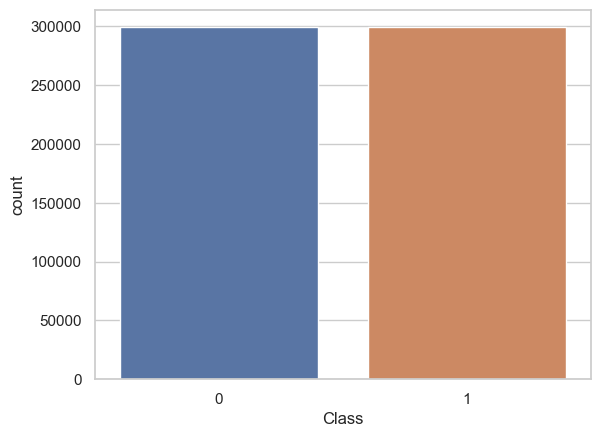

In [264]:
sns.countplot(x='Class', data=df_equilibrado)

In [266]:
x_equilibrado = df_equilibrado[['Flight', 'Time', 'Length',  'DayOfWeek']]
y_equilibrado = df_equilibrado['Class']

In [267]:
x_train, x_test, y_train, y_test = train_test_split(x_equilibrado, y_equilibrado, test_size=0.3, stratify=y_equilibrado, random_state=7)

In [268]:
gnb_equilibrado = GaussianNB()
gnb_equilibrado.fit(x_train, y_train)

GaussianNB()

In [269]:
y_pred_gnb_equilibrado = gnb_equilibrado.predict(x_test)

In [270]:
accuracy_equilibrado = accuracy_score(y_test, y_pred_gnb_equilibrado)
print('Accuracy: ', round(accuracy_equilibrado, 2))

Accuracy:  0.57


In [271]:
x_train, x_test, y_train, y_test = train_test_split(x_equilibrado, y_equilibrado, test_size=0.3, random_state=7)

In [272]:
rf = RandomForestClassifier(random_state=7)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [273]:
accuracy_equilibrado_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy: ', round(accuracy_equilibrado_rf, 2))

Accuracy:  0.69
